# Brian Huang, Danny (Marco) Morocho, Max Halvax, and Tatum Maston
## University of California, San Diego

In [11]:
import fashion
fc = fashion.fashionCleaner()
df = fc.getData()
gv = fashion.genViz(df)

### Exploratory Data Analysis

The datasets we chose contained information around clothing reviews from customers that had purchased them. It contains both ratings and reviews, fit feedback, measurements concerning the users body, and a review summary. We found that 46,081 entries were missing bust size, so we decided to throw them out, leaving us with around 150,000 entries to work with. Below are a few statistics summarizing the given quantitative data. 

In [14]:
df.describe()

,weight,rating,height,size,age,bust,bust_cat,cup_cat
count,146381.000000,146381.000000,146381.000000,146381.000000,146381.000000,146381.000000,146381.000000,146381.000000
mean,137.209870,9.081985,65.263053,11.437919,34.089800,34.110738,3.055369,3.002248
std,21.540182,1.437853,2.659230,7.826784,8.113217,1.701981,0.850991,1.333326
min,50.000000,2.000000,54.000000,0.000000,0.000000,28.000000,0.000000,0.000000
25%,123.000000,8.000000,63.000000,4.000000,29.000000,32.000000,2.000000,2.000000
50%,135.000000,10.000000,65.000000,9.000000,32.000000,34.000000,3.000000,3.000000
75%,148.000000,10.000000,67.000000,16.000000,37.000000,36.000000,4.000000,4.000000
max,300.000000,10.000000,78.000000,58.000000,117.000000,48.000000,10.000000,12.000000


The medians of these features make sense, however some minimums and maximums are quite absurd, indicating that there are outliers present. We took care of this by creating ranges for measurements that we deemed reasonable. Below, we see distributions of height and weight. 

(<Figure size 1152x288 with 2 Axes>,
 array([<AxesSubplot:xlabel='height', ylabel='count'>,
        <AxesSubplot:xlabel='weight', ylabel='Density'>], dtype=object))

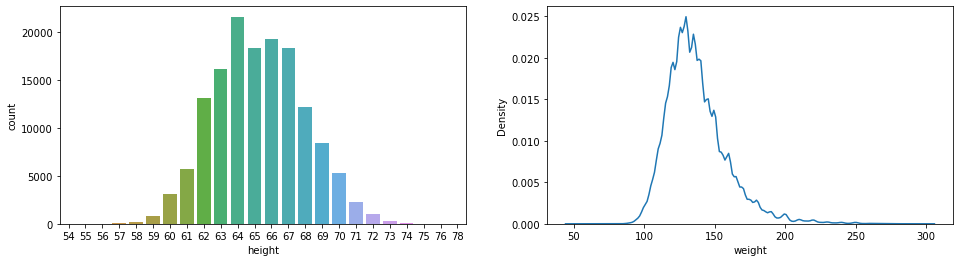

In [15]:
gv.genHeightWeight()

We see the bulk of the heights lying within the 63-38 inch range, while the majority of weight lies within the 110-150 lbs range. Since the clothing items present in the dataset are all women’s, we are assuming that close to all users are biological women, so these observed statistics are valid. 


We also found that overwhelmingly the reviews are 10/10, a common problem amongst rating data as people tend to only review when they have a strong opinion.  For this reason, we chose to stay away from predictions concerning the ratings as the options seen are not well distributed. 

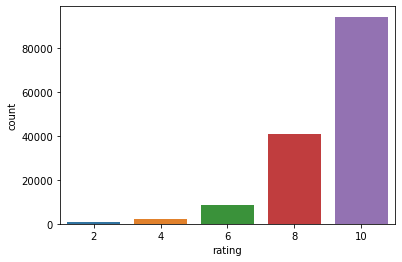

In [16]:
gv.genAgeRating(age = False)

We also thought it was interesting how people self-reported an hourglass and athletic body shape the most, especially because these are thought of as the most “conventionally attractive”. 

(<Figure size 1152x576 with 1 Axes>,
 <AxesSubplot:xlabel='body type', ylabel='count'>)

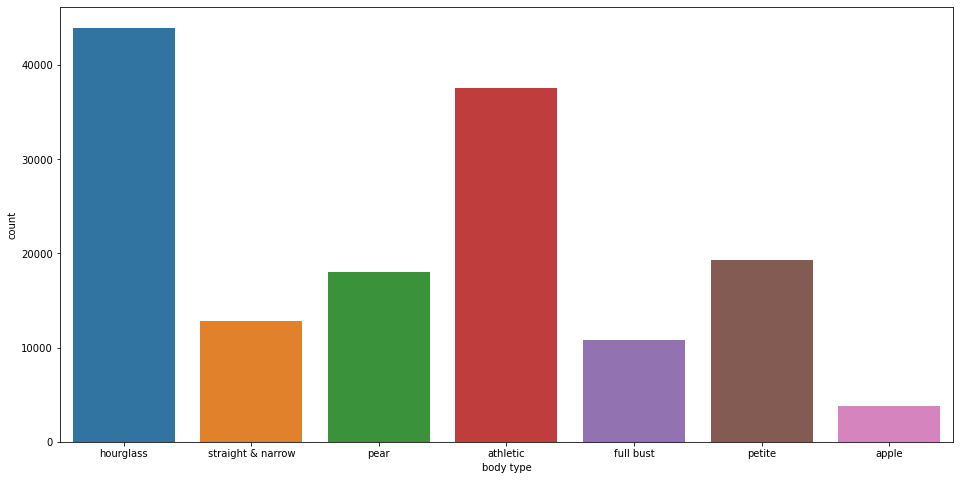

In [18]:
gv.genBodyType()

Regression between weight, height, and clothing size shows that there is some sort of correlation between these features and bust size. These plots were our motivation in trying to predict bust and cup sizes based on other features present in the review.

((<Figure size 1152x288 with 2 Axes>,
  array([<AxesSubplot:xlabel='cup', ylabel='count'>,
         <AxesSubplot:xlabel='bust', ylabel='count'>], dtype=object)),
 (<Figure size 1152x288 with 4 Axes>,
  array([<AxesSubplot:xlabel='weight', ylabel='bust'>,
         <AxesSubplot:xlabel='height', ylabel='bust'>,
         <AxesSubplot:xlabel='size', ylabel='bust'>,
         <AxesSubplot:xlabel='rating', ylabel='bust'>], dtype=object)))

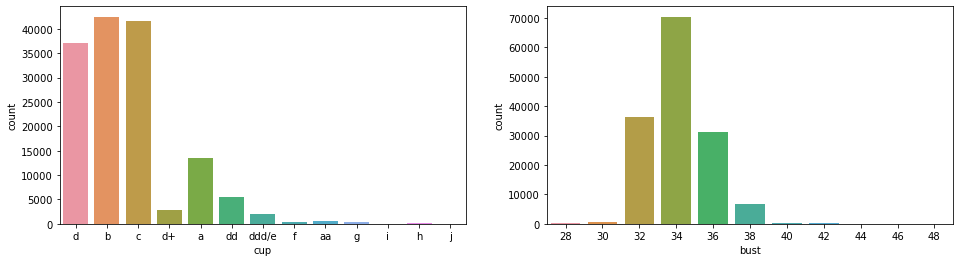

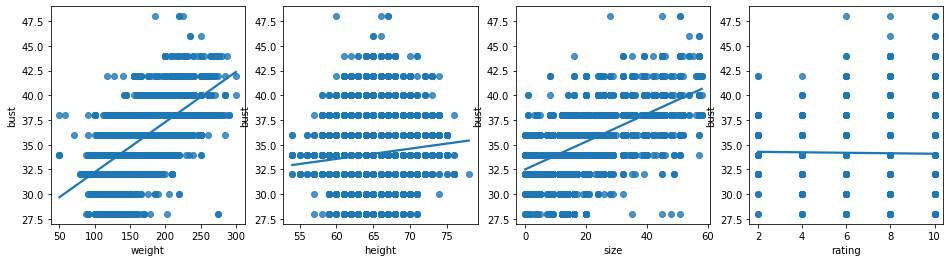

In [22]:
gv.genBustCup(), gv.genTrends()

### Identifying a Predictive Task

For our model, we want a good mix of features from the dataset. With numerical data such as weight, size, height, age, and rating.Through EDA,  We found these features to be positively correlated and useful for our task of predicting bust size. In addition we wanted to use categorical features of the dataset, for which we had to One Hot Encode, starting with “rented for”, which has valuable information about the user and what they want out of the outfit, e.g. a date could be a lower bust size in order to make the figure and shape of the person wearing it more visible. On the other hand an item rented for lounging could have a larger bust/cup size for more comfort. In addition we used the category of the outfit for similar reasons, dresses might be more revealing and smaller bust size, whereas a t- shirt would have a larger bust size for comfort. Finally we looked at body type for similar reasons that it could tell us, pear shaped bodies would likely have more body fat than a straight and narrow person, leading to larger bust size. These One Hot Encoding and numerical features formed a strong basis for our model. Next we moved to rethinking how we were predicting bust size. A bust size has two parts, bust and cup size. Cup size is ordinal with B being larger than A, C being larger than B etc.. We turned these lettering sizes into numbers to make these predictable with logistic regression and later Random forest tree classifier which allowed for fast training, and higher accuracy but a lower prediction speed. The increase in accuracy comes from the possible randomness and inconsistency between manufacturers that affects how an outfit fits a customer. With bust size it was a different story. Bust size is numerical yes, but not continuous meaning there aren’t half sizes, only the set numbers used by clothing designers and manufacturers. We used a similar process from the cup size categories on bust size since a prediction that landed in the middle of two busts would have to be rounded up or down anyways.The next decisions we made were based around the review summary feature, a text feature that is a review left by the customer. Our initial strategy was to fit and transform the review summary  column with a tfidf vectorizer in hopes that some words present in the review would give information as to the size of the customer and possibly their bust size. When we came up with this idea we had words like “petite”, “plus”, “heavy”,“thin” etc.. . We also attempted two versions of a countvectorizer, one version using unigrams and bigrams, while the other utilized bigrams only. Our expectation was that people would leave reviews with phrases like “plus sized”, “too small” “too large” etc..

When evaluating our model. We kept two options open, overall accuracy and MSE. With this prediction task these have positives and negatives to them. When using logistic regression, accuracy is important to model effectiveness but does not account for magnitude of error, for example a misclassification of an A cup as a D cup detracts from the value of clothing to a potential customer much more than classifying an A cup as B cup which is a smaller, but not insignificant difference. The same goes with Bust measurements. MSE on the other hand does show how far off the classification is , since the data we’re predicting is ordinal, an MSE of  1 means that on average the model is guessing one size too low or one size too high. This is useful but considering that this is not a continuous numerical set, if we get a model that predicts a half size too large or too small, there are not half sizes available and therefore we round up or down to the next nearest size. For most people an outfit that is a full size too large or too small would be a dealbreaker and therefore not a useful prediction, so we figured ultimately, that accuracy percentage would be the most useful metric since we want exact matches. We also decided on looking at predicting both cup and bust at the same time, but quickly realized that predicting one or the other would work better for our model since some busts overlap into different cup sizes.


For a baseline Comparison, we used linear regression with numeric features to come up with a numeric prediction for bust size since it is numerical resulting in an accuracy of 30%. For Cup size we used logistic regression with similar features and had a similar accuracy of around 25%.


### Modeling

 The model we ultimately landed on was logistic regression  and random Forest Classification with a bigram count vectorizer. This landed us the highest accuracy when predicting bust and cup size respectively. With logistic regression and bust size being coded into ordinal categories, we observed a large improvement over linear regression (increasing accuracy by 20%). This makes sense as logistic regression is better suited for ordinal categories and classification, rather than linear regressions continuous numerical predictions. In addition to improving over linear regression, we saw an increase in accuracy for both cup and bust prediction when moving from a tfidf vectorizer to a bigram count vectorizer model, while this did increase the size of our model and affect the scalability, we still observed an increase in accuracy when scoring the test data. The strength of these models comes from the individual predictions of bust and cup size. Now the accuracy overall was not exceptionally high for either, but with multiclass prediction, there are a lot of factors working against a high accuracy result. For example a 50% accuracy in a 2 classification model is trivial, it is significantly better in a 10-12 class model which is the amount of categories we ended up with for bust and cup size categories. One model that we attempted to use was XGBoost, a popular boost model in the industry. Our attempts to fit an XGB regressor to the model either resulted in excessive overfitting or underfitting, leading us back to our regressor and forest classification.


### Related Literature

 Predicting fashion using data analytics is a growing topic in order to get a better understanding of customer behavior and target their preferences to increase purchases. A study, “Predicting Fashion using Machine Learning techniques”, conducted at KTH Royal Institute of Technology in Stockholm Sweden trained classification learning models on real-world fashion data. Using numerous classifiers such as Linear Models and Decision Trees, they were able to successfully predict fashion choices with an average accuracy of 65%. Although they were not predicting similar fashion components as us, they focused on predicting the most popular and unpopular products in terms of number of clicks and sales and popularity rates. Similarly, Data Analytic firms are sourcing their data from social media platforms such as Instagram to predict the latest fashion trends. With millions of pictures being posted everyday, pictures are collected and analyzed in order to give companies the best recommendations of fashion pieces to sell. According to Heuritech, brands miss 78% of insights with text-based analysis only. Being able to predict fashion trends is important, but predicting the correct fit is what leads to customer satisfaction and keeps customers coming back for more. The literature piece “A Deep Learning System for Predicting Size and Fit in Fashion and E-Commerce” describes the use of a Bayesian and a Size-and-Fit Network approach to compare with their baselines. In their Size and Fit Network, they were able to use categorical features like weight to train their model. In the end, this network slightly outperformed The Bayesian Model and baselines. However, they do state that their models can benefit from more features, such as including ordinal features. The Literature work “Anthropometry, Apparel Sizing and Design” outline the methodology for sizing system development. Anthropometric analysis, the study of the measurements and proportions of the human body,


### Results and Conclusions

In our modeling, we decided that the best approach for modeling bust and cup would be Logistic Regression and Random Forest Classification respectively. With around 60% accuracy for the bust measurement and predictions on cup size rounding out at around 40%. This performance, for both predictions, is a large improvement compared to our initial model and other alternatives. The features that worked best for us in predicting both bust and cup size were weight, height, size, body type, age, and review text. The features that did not contribute to our predictions were rating, review summary, reason rented, and category. Most of the numeric features were useful as they had a direct correlation with bust and cup size. Weight, height, and size directly correlate with fit and bust size, with some outliers(for example individuals with a smaller frame and larger bust or vice-versa). Body shape could be one hot encoded (as it was a categorical variable), which allowed us to incorporate an individual's description of their build into our model. Age was an important feature, but not as much as the previously discussed features. Age would make sense as some individuals who are younger may fall in a smaller distribution of bust sizes, however the same outliers still apply. Review text was useful as well. We applied TF-IDF and bi-grams, allowing us to weigh the importance of terms mentioned in the review text. TF-IDF allows us to extract possibly meaningful terms that may relate to a person’s sizing or description of themselves and uni-grams allows us to extract useful pairings of words, in some cases the exact bust size of an individual (users can mention that they’re 32 C for example). Features such as rating, reason for renting, category, and review summary had much less weight in our predictions. To begin with, a majority of ratings were positive, and rating itself has very little correlation to fit. While rating could be high for an item that fits well, it could also be high for something that fits large and looks nice. Reason for renting had no correlation with sizing at all. Category of item could contribute to predictions, but since our problem is essentially predicting the size of a specific article of clothing that usually needs to fit (most individuals tend to not purchase oversized/undersized bras), category of item did not provide much to our model. Review summary provides redundancy to our model and may remove important features that are captured in the entire review text. Our model parameters mostly involved adjusting the amount of items to include in our TF-IDF as well as the number of layers for each tree in our RandomForestClassifier. For both, tuning the parameter meant finding the parameters that included enough information to deduce a prediction without overwhelming our model with noise. This meant lowering our parameters for both the number of items we included in TF-IDF and the number of layers for each individual tree. Our proposed models succeeded due to our question heavily being a classification question. Linear regression failed for bust size as sizes don’t exist in .33 or even .5 sizes. We could not afford being off by a decimal value for each bust size, and it was much better for us to just round out our predictions to the nearest size, which meant classification would be much better for tackling this problem. 
